In [9]:
import pandas as pd
car = pd.read_csv('toyota_cars.csv')
car.State

0         FL
1         FL
2         FL
3         FL
4         CO
        ... 
77781     GA
77782     GA
77783     AR
77784     TX
77785     SC
Name: State, Length: 77786, dtype: object

In [11]:
print(car['State'].dtype)


object


In [21]:
car['State'] = car['State'].str.strip()
df_t_s = car[car['State'] == 'CA']
df_t_s

,Price,Year,Mileage,State,Model
87,12499,2016,11399,CA,CorollaLE
103,11500,2016,37160,CA,CorollaLE
140,11499,2015,17395,CA,CorollaLE
176,13491,2016,11582,CA,CorollaL
213,11499,2015,19639,CA,CorollaLE
...,...,...,...,...,...
77643,43326,2015,20803,CA,Tundra
77648,67500,2016,10068,CA,Tundra
77649,62477,2016,35715,CA,Land
77687,74999,2017,8296,CA,Land


In [23]:
# Drop the 'State' column from df_t_s
df_t_s.drop('State', axis=1, inplace=True)

# Now df_t_s has the 'State' column dropped
ca_cars = df_t_s


/var/folders/9q/qw7c67zn1gnbxdsg7f1r540m0000gn/T/ipykernel_20897/4214033138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_s.drop('State', axis=1, inplace=True)


In [25]:
#ca_cars.to_csv('ca_toyota_used_cars.csv')

In [32]:
current_year = 2024  #current year is 2024
ca_cars['Car Age'] = current_year - ca_cars['Year']
ca_cars.drop('Year', axis=1, inplace=True)

/var/folders/9q/qw7c67zn1gnbxdsg7f1r540m0000gn/T/ipykernel_20897/3085289211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_cars['Car Age'] = current_year - ca_cars['Year']
/var/folders/9q/qw7c67zn1gnbxdsg7f1r540m0000gn/T/ipykernel_20897/3085289211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_cars.drop('Year', axis=1, inplace=True)


In [33]:
ca_cars

,Price,Mileage,Model,Car Age
87,12499,11399,CorollaLE,8
103,11500,37160,CorollaLE,8
140,11499,17395,CorollaLE,9
176,13491,11582,CorollaL,8
213,11499,19639,CorollaLE,9
...,...,...,...,...
77643,43326,20803,Tundra,9
77648,67500,10068,Tundra,8
77649,62477,35715,Land,8
77687,74999,8296,Land,7


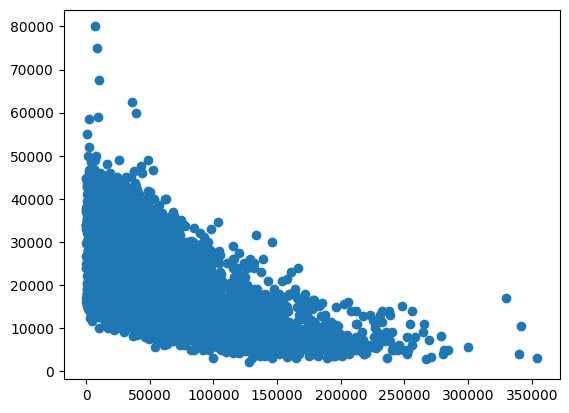

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(ca_cars['Mileage'], ca_cars['Price'])

In [36]:
dummies = pd.get_dummies(ca_cars.Model)
dummies

,4Runner2WD,4Runner4WD,4Runner4dr,4Runner4x2,4Runner4x4,4RunnerRWD,4RunnerSR5,86Automatic,86Manual,Avalon,...,Yaris,Yaris3-Door,Yaris3dr,Yaris4dr,Yaris5-Door,Yaris5dr,YarisBase,YarisFleet,YarisL,YarisSedan
87,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
140,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77643,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77648,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77649,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
df = pd.concat([ca_cars,dummies], axis='columns')

In [39]:
df.drop(['Yaris', 'Model'], axis='columns',inplace=True)
df

,Price,Mileage,Car Age,4Runner2WD,4Runner4WD,4Runner4dr,4Runner4x2,4Runner4x4,4RunnerRWD,4RunnerSR5,...,"VenzaXLE,",Yaris3-Door,Yaris3dr,Yaris4dr,Yaris5-Door,Yaris5dr,YarisBase,YarisFleet,YarisL,YarisSedan
87,12499,11399,8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,11500,37160,8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
140,11499,17395,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
176,13491,11582,8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
213,11499,19639,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77643,43326,20803,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77648,67500,10068,8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77649,62477,35715,8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77687,74999,8296,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
X = df.drop(['Price'],axis='columns')
y = df.Price

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.1)

In [53]:
X_test

,Mileage,Car Age,4Runner2WD,4Runner4WD,4Runner4dr,4Runner4x2,4Runner4x4,4RunnerRWD,4RunnerSR5,86Automatic,...,"VenzaXLE,",Yaris3-Door,Yaris3dr,Yaris4dr,Yaris5-Door,Yaris5dr,YarisBase,YarisFleet,YarisL,YarisSedan
8908,29978,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12249,36463,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19442,36399,9,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
29638,175909,17,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23282,21805,9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75411,41043,8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48347,39384,10,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
10771,48871,9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52768,75572,12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
model.predict(X_test)

array([19163.45149604, 15555.78873572, 11384.80092485,  3696.1824694 ,
       17638.97871432, 19921.13258488, 36069.46054645, 24806.95883626,
       18205.86727523, 12796.15275169, 27082.47750235, 21116.6310081 ,
       17629.17620917, 30607.80266565, 37373.36983903, 10531.45827832,
        5110.45927567, 18011.23340127, 16222.89556208, 18811.7154176 ,
       14458.96049283, 15635.15852558,  6061.04240603, 20556.46332008,
       32212.22300029, 16001.65883794, 16829.10968226,   835.99894987,
       17142.02366454, 17426.4940776 , 17621.14185362, 22963.53515106,
        8387.17932348, -4934.11445987, 19733.48722148, 30733.68682509,
       18991.58137462, 20585.18558028, 17316.74735309, 33407.95332205,
       16790.65168991, 12286.14283833, 33991.30642384, 36783.83076603,
       19839.2483066 ,  8659.19683097, 15490.4813115 , 19873.10053911,
       17045.17596319, 18218.58556143, 15911.40347335, 15951.5512463 ,
       17847.22094272, 21874.03072836,  5246.92471413, 17707.89542937,
      

In [56]:
model.score(X_test, y_test)

0.8452742736093627